Оценим каждое слагаемое, начиная с какого-то места, как $\frac{1}{(k - 1)^2}$. Посчитать интеграл, начиная с $n$.
$$\int_{n}^{\infty} \frac{dx}{(x - 1)^2} = -\frac{1}{(x - 1)}\bigg{|}_{n}^{\infty} = \frac{1}{(n - 1)}.$$
Дальше $\frac{1}{(n - 1)} =  \epsilon$, то есть $n \approx \frac{1}{\epsilon} + 1$.

In [19]:
eps = 1e-6

In [20]:
import matplotlib.pyplot as plt
import numpy as np
def plot(w, title=None, func_name=None):
    t = np.arange(start=0.01, stop=1.92, step=0.1)
    s = [w(ti) for ti in t]


    fig, ax = plt.subplots()
    ax.plot(t, s)

    ax.set(xlabel='z', ylabel=func_name,
           title=title)
    ax.grid()
    plt.show()

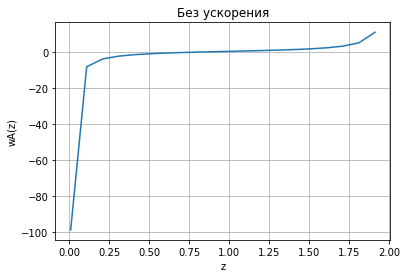

In [21]:
def sum_member_A(k, z):
    return 1 / (k ** 2 - k - z)


def wA(z):
    n = int(1 / eps) + 1
    return sum(map(lambda k : sum_member_A(k, z), range(1, n)))

plot(wA, 'Без ускорения', 'wA(z)')

 Теперь мы хотим посчитать с помощью ускорения. Возьмём ряд $\frac{1}{k(k - 1)}$ для $k \ge 2$. Его сумма $1$.
    
  Если рассмотреть разность рядов, то получим $\sum_{1}^{\infty} \frac{1}{k^2 - k - z} = - \frac{1}{z} + \sum_{2}^{\infty} \frac{1}{k^2 - k - z} = - \frac{1}{z} + \sum_{2}^{\infty} (\frac{1}{k^2 - k - z} - \frac{1}{k^2 - k}) + 1 = 1 - \frac{1}{z} + z \sum_{2}^{\infty}  (\frac{1}{(k^2 - k - z)k (k - 1)})$
    
  Теперь нам снова надо оценить интеграл $\frac{1}{(k^2 - k - z)k (k - 1)}$. Скажем, что если мы уменьшим знаменатель, то интеграл только увеличится, и оценим его, как $\frac{1}{(k - 1)^4}$ (выберем такое $z$, чтобы эта оценка выполнялась). $$\int_{n}^{\infty} \frac{dx}{(x - 1)^4} = -\frac{1}{3(x - 1)^3}\bigg{|}_{n}^{\infty} = \frac{1}{3(n - 1)^3}.$$
    
  В таком случае, $\frac{z}{3 (n - 1)^ 3} \approx \epsilon$, то есть $n \approx \sqrt[3]{\frac{z}{3 \epsilon}} + 1.$
    

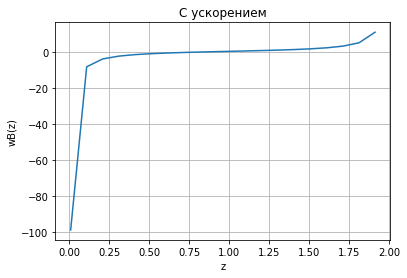

In [22]:
def sum_member_B(k, z):
    return z / ((k ** 2 - k - z) * k * (k - 1))


def wB(z):
    n = int((z / (3 * eps)) ** (1 / 3)) + 2
    return sum(map(lambda k: sum_member_B(k, z), range(2, n))) + 1 - 1 / z

plot(wB, 'С ускорением', 'wB(z)')

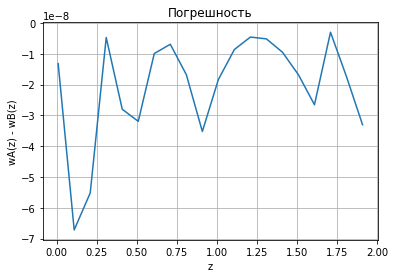

In [23]:
plot(lambda z : wA(z) - wB(z),  'Погрешность', 'wA(z) - wB(z)')